# Loader pytorch pour video 

## Bibliothèques et chemins

In [2]:
from video_dataset import  VideoFrameDataset, ImglistToTensor
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os

/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
classes = ('0', '1', '2')
# 0=Vimizer /// 1=youtube /// 2=tiktok 
videos_root = os.path.join(os.getcwd(), 'dataset')
annotation_file = os.path.join(videos_root, 'annotation.txt')

## Fonction d'affichage

In [4]:
### Paramètres ####
# - rows et cols déterminent le nombre de lignes et de colonnes dans la grille d'images.
# - frame_list est une liste d'images qui composent la vidéo. Chaque élément de cette liste représente une image individuelle de la vidéo.
# - plot_width et plot_height sont la largeur et la hauteur de l'ensemble de la grille d'images

def plot_video(rows, cols, frame_list, plot_width, plot_height, title: str):
    fig = plt.figure(figsize=(plot_width, plot_height)) # Initialise la figure
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )

    for index, (ax, im) in enumerate(zip(grid, frame_list)):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(index)
    plt.suptitle(title)
    plt.show()

## Loader

<p>As of torchvision 0.8.0, torchvision transforms support batches of images
of size (BATCH x CHANNELS x HEIGHT x WIDTH) and apply deterministic or random
transformations on the batch identically on all images of the batch. Any torchvision
transform for image augmentation can thus also be used  for video augmentation. </p>

In [5]:
##### Image preprocessing #####
preprocess = transforms.Compose([
        ImglistToTensor(),  # list of PIL images to (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        transforms.Resize(576),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        
])

In [6]:
# Creation of dataset object which return a list of x PIL images or 
# ``FRAMES x CHANNELS x HEIGHT x WIDTH``
# tensors where FRAMES=x if the ``ImglistToTensor()`` transform is used

dataset = VideoFrameDataset(
        root_path=videos_root,
        annotationfile_path=annotation_file,
        num_segments=5, #Nombre de segment par vidéo
        frames_per_segment=1, #Nombre de frame extraite par segment ( soit 5*1 Frames par vidéo)
        imagefile_template='img_{:05d}.png',
        transform=preprocess,
        test_mode=False # If True, frames are taken from the center of each segment, instead of a random location in each segment.
        
    )



In [7]:
print ( 'Nombre de vidéos chargées :' , len(dataset)) 
# Résultat attendu 3 * 11 = 33 vidéo

Nombre de vidéos chargées : 33


In [8]:
### Inspectons l'une d'elle numéro 3 ### 
sample = dataset[2] # Liste contenant : (0) le tensor , (1) le label d'une video
frame_tensor = sample[0]  # tensor of shape (NUM_SEGMENTS*FRAMES_PER_SEGMENT) x CHANNELS x HEIGHT x WIDTH
label = sample[1]  # integer label


print('Video Tensor Size:', frame_tensor.size())
print('Label ', label)


Video Tensor Size: torch.Size([5, 3, 576, 576])
Label  0


/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


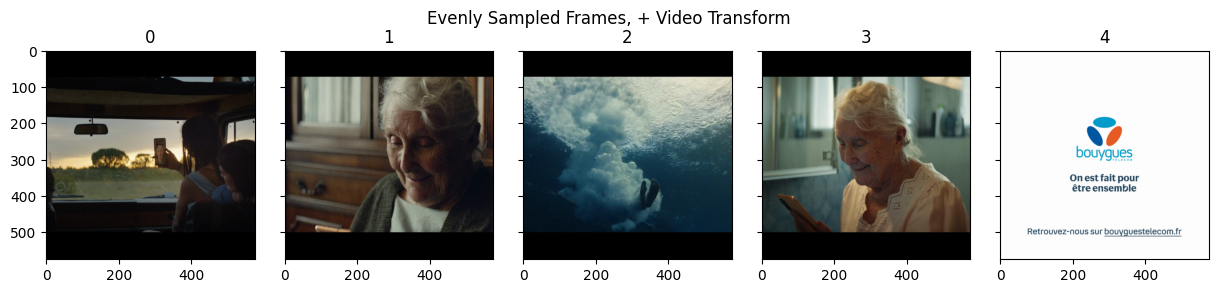

In [11]:
#### Fonction qui nous permet de vérifier que l'on a bien chargé les bonnes images ####
#### Input: Tensor ///// Output : Image dénormalisée

def denormalize(video_tensor):
        """
        Undoes mean/standard deviation normalization, zero to one scaling,
        and channel rearrangement for a batch of images.
        args:
        video_tensor: a (FRAMES x CHANNELS x HEIGHT x WIDTH) tensor
        """
        #inverse_normalize = transforms.Normalize(
        #mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        #std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
        #)

        #return (inverse_normalize(video_tensor) * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()
        return (video_tensor * 255.).type(torch.uint8).permute(0, 2, 3, 1).numpy()


frame_tensor = denormalize(frame_tensor)
plot_video(rows=1, cols=5, frame_list=frame_tensor, plot_width=15., plot_height=3.,
                title='Evenly Sampled Frames, + Video Transform')

In [12]:
""" DEMO 3 CONTINUED: DATALOADER """
dataloader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=2,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

for epoch in range(10):
        for video_batch, labels in dataloader:
            """
            Insert Training Code Here
            """
            print("\nVideo Batch Tensor Size:", video_batch.size()) # Ici on récupère 2 vidéo 
            print("Batch Labels Size:", labels.size()) # Les Labels associés
            break
        break


/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zough/Documents/VAP/PFE/AI-for-coding-green-videos/IA/venv/lib/pyt

0

Video Batch Tensor Size: torch.Size([2, 5, 3, 576, 576])
Batch Labels Size: torch.Size([2])
